# Marketing Campaign for Banking Products 

**Data Description**

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).

Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**Context**

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.


# Step1 :  Import the datasets and libraries, check datatype, statistical summary, shape, null values etc


**1.1 Importing Libraries**

In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**1.2 Reading Data**

In [2]:
bankData = pd.read_csv("/content/bank.csv")


**1.3 Analyzing with head details**

In [3]:
bankData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**1.4 Shape of Data**

In [4]:
bankData.shape

(5000, 14)

Has 5000 rows and 14 columns

**1.5 Characterizing columns in data** 

In [5]:
bankData.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


**Columns characterization**

1. **Measurement Variables**:
  * **Nominal Variables**:
    1. **ID**-Person's ID

  * **Ordinal Variables**:
    1. **Family**-Family size of Customer
    2. **Education**-Education Level. 1-UnderGrad, 2-Graduate, 3-Advanced
    3. **Zip Code**-Home Address
  
  * **Interval Variables**:
    1. **Age**-Customer's age
    2. **Experience**-years of professional experience
    3. **Income**-Annual income of customer
    4. **CCAvg**-Avg spending in credit cards per month
    5. **Mortage**-Value of house mortage

2. **Decision(0/1) variables**:
    1. **Personal Loan**-Accepted personal loan or not
    2. **Securities Account**-Have an securities account or not
    3. **CD Account**-Have an certificate of deposit or not
    4. **Online**-Does customer use internet banking facilities or not
    5. **Credit Card**-Have an credit card or not






**1.6 Info and description about Data**

In [6]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


This info shows that there are no missing values in any column

In [7]:
bankData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Step2 : Check if you need to clean the data for any of the variables

**2.1 Checking if there are any negative values in data, if yes in which columns**

In [8]:
bankData.apply(lambda x: sum(x<0))

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

This shows that 52member's experience is given negative values, but experience can never be negative.

**2.2 Either we can fill Experience or we can drop it if it is highly correlated with any other column**

Here we check its correlation with other columns

In the below cell, we will check correlation of 'experience' with all other columns and return the highest correlation value and the name of column withwhich it has highest correlation respectively.

In [9]:
experience = bankData['Experience']
cols = bankData.columns
maxi = 0
correlated_col = ''
for i in cols:
  correlation = experience.corr(bankData[i])
  if i!='Experience' and correlation > maxi:
    maxi = correlation
    correlated_col = i
maxi, correlated_col

(0.9942148569683321, 'Age')

**Inference:** The highest correlation of Experience with one of other columns is 0.994.... , so data will not change much with dropping Experience column.

In [10]:
#dropping Experience and also id column because there's no se of id column
bankData = bankData.drop(['Experience', 'ID'], axis = 1)
print(bankData.columns)
bankData.head() 

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')


,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


# Step3: EDA

**3.1 No.of unique in each column**

In [11]:
bankData.apply(lambda value: len(value.unique()))

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Zip code has too many unique values, which makes it difficult to apply one hot encodng to normalise it. So its better to drop it.

In [12]:
bankData = bankData.drop(['ZIP Code'], axis=1)
bankData.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


**3.2 No.of people with zero mortgages** 

In [13]:
mortgages = bankData['Mortgage'].value_counts()
mortgages[0]

3462

**3.3 No.of people with zero credit card spending per month**

In [14]:
creditCardSpent = bankData['CCAvg'].value_counts()
creditCardSpent[0]

106

##**3.4 Value counts of all categorical columns**

Categorical columns and their value counts in order

In [15]:
#Family
bD = bankData['Family'].value_counts()
bD

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [16]:
#Education
bankData['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

##**3.5 Univariate Analysis**

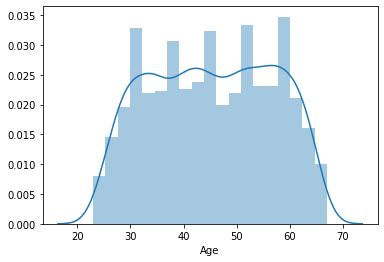

In [17]:
#Age
sns.distplot(bankData['Age'])

Age column is already normalized

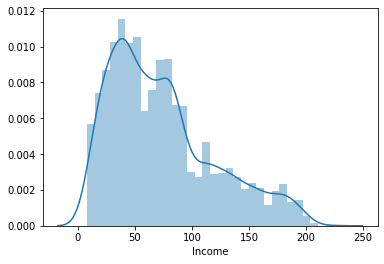

In [18]:
#Income
sns.distplot(bankData['Income'])

Income column is right skewed, so it shall be normalized.

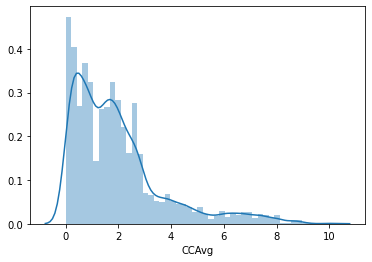

In [19]:
#CCAvg
sns.distplot(bankData['CCAvg'])

CCAvg column is also right skewed, it also shall be normalized.

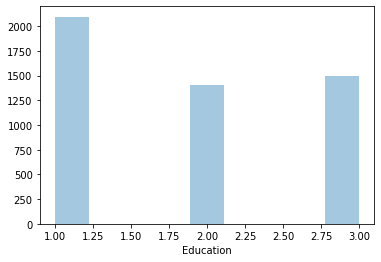

In [20]:
#Education
sns.distplot(bankData['Education'], kde=False)

We can say that education column is normalized from above graph.

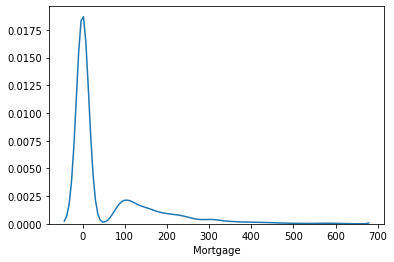

In [21]:
#Mortgage
sns.distplot(bankData['Mortgage'], hist=False)

Mortgage column is highly skewed, and also most values of it are zeroes, if we try to normalize it, it may lead to wrong data resulting in inaccuracy of our model.

So its better to drop mortgage.

In [22]:
#drop mortgage
bankData = bankData.drop(['Mortgage'], axis=1)
bankData.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


Below,
from personal loan all are binary variables, so there is no need to check whether there is skewness or not etc.

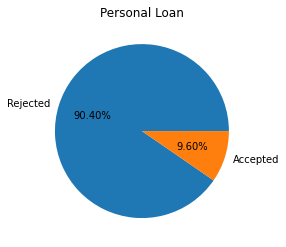

In [23]:
#personal Loan
plt.pie(bankData['Personal Loan'].value_counts(),labels=['Rejected','Accepted'],autopct='%1.2f%%')
plt.title("Personal Loan")
plt.show()

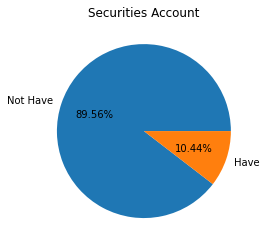

In [24]:
#securities Account
plt.pie(bankData['Securities Account'].value_counts(),labels=['Not Have','Have'],autopct='%1.2f%%')
plt.title("Securities Account")
plt.show()

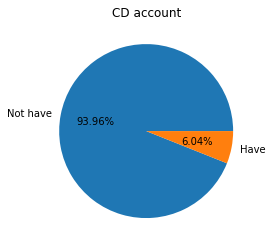

In [25]:
#CD Account
plt.pie(bankData['CD Account'].value_counts(),labels=['Not have','Have'],autopct='%1.2f%%')
plt.title("CD account")
plt.show()

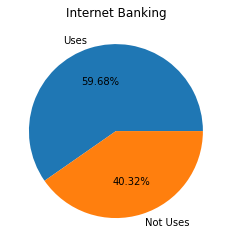

In [26]:
#Online
plt.pie(bankData['Online'].value_counts(),labels=['Uses','Not Uses'],autopct='%1.2f%%')
plt.title("Internet Banking")
plt.show()

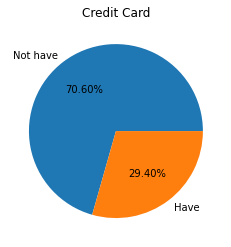

In [27]:
#Credit Card
plt.pie(bankData['CreditCard'].value_counts(),labels=['Not have','Have'],autopct='%1.2f%%')
plt.title("Credit Card")
plt.show()

##**3.6 Bivariate Analysis**

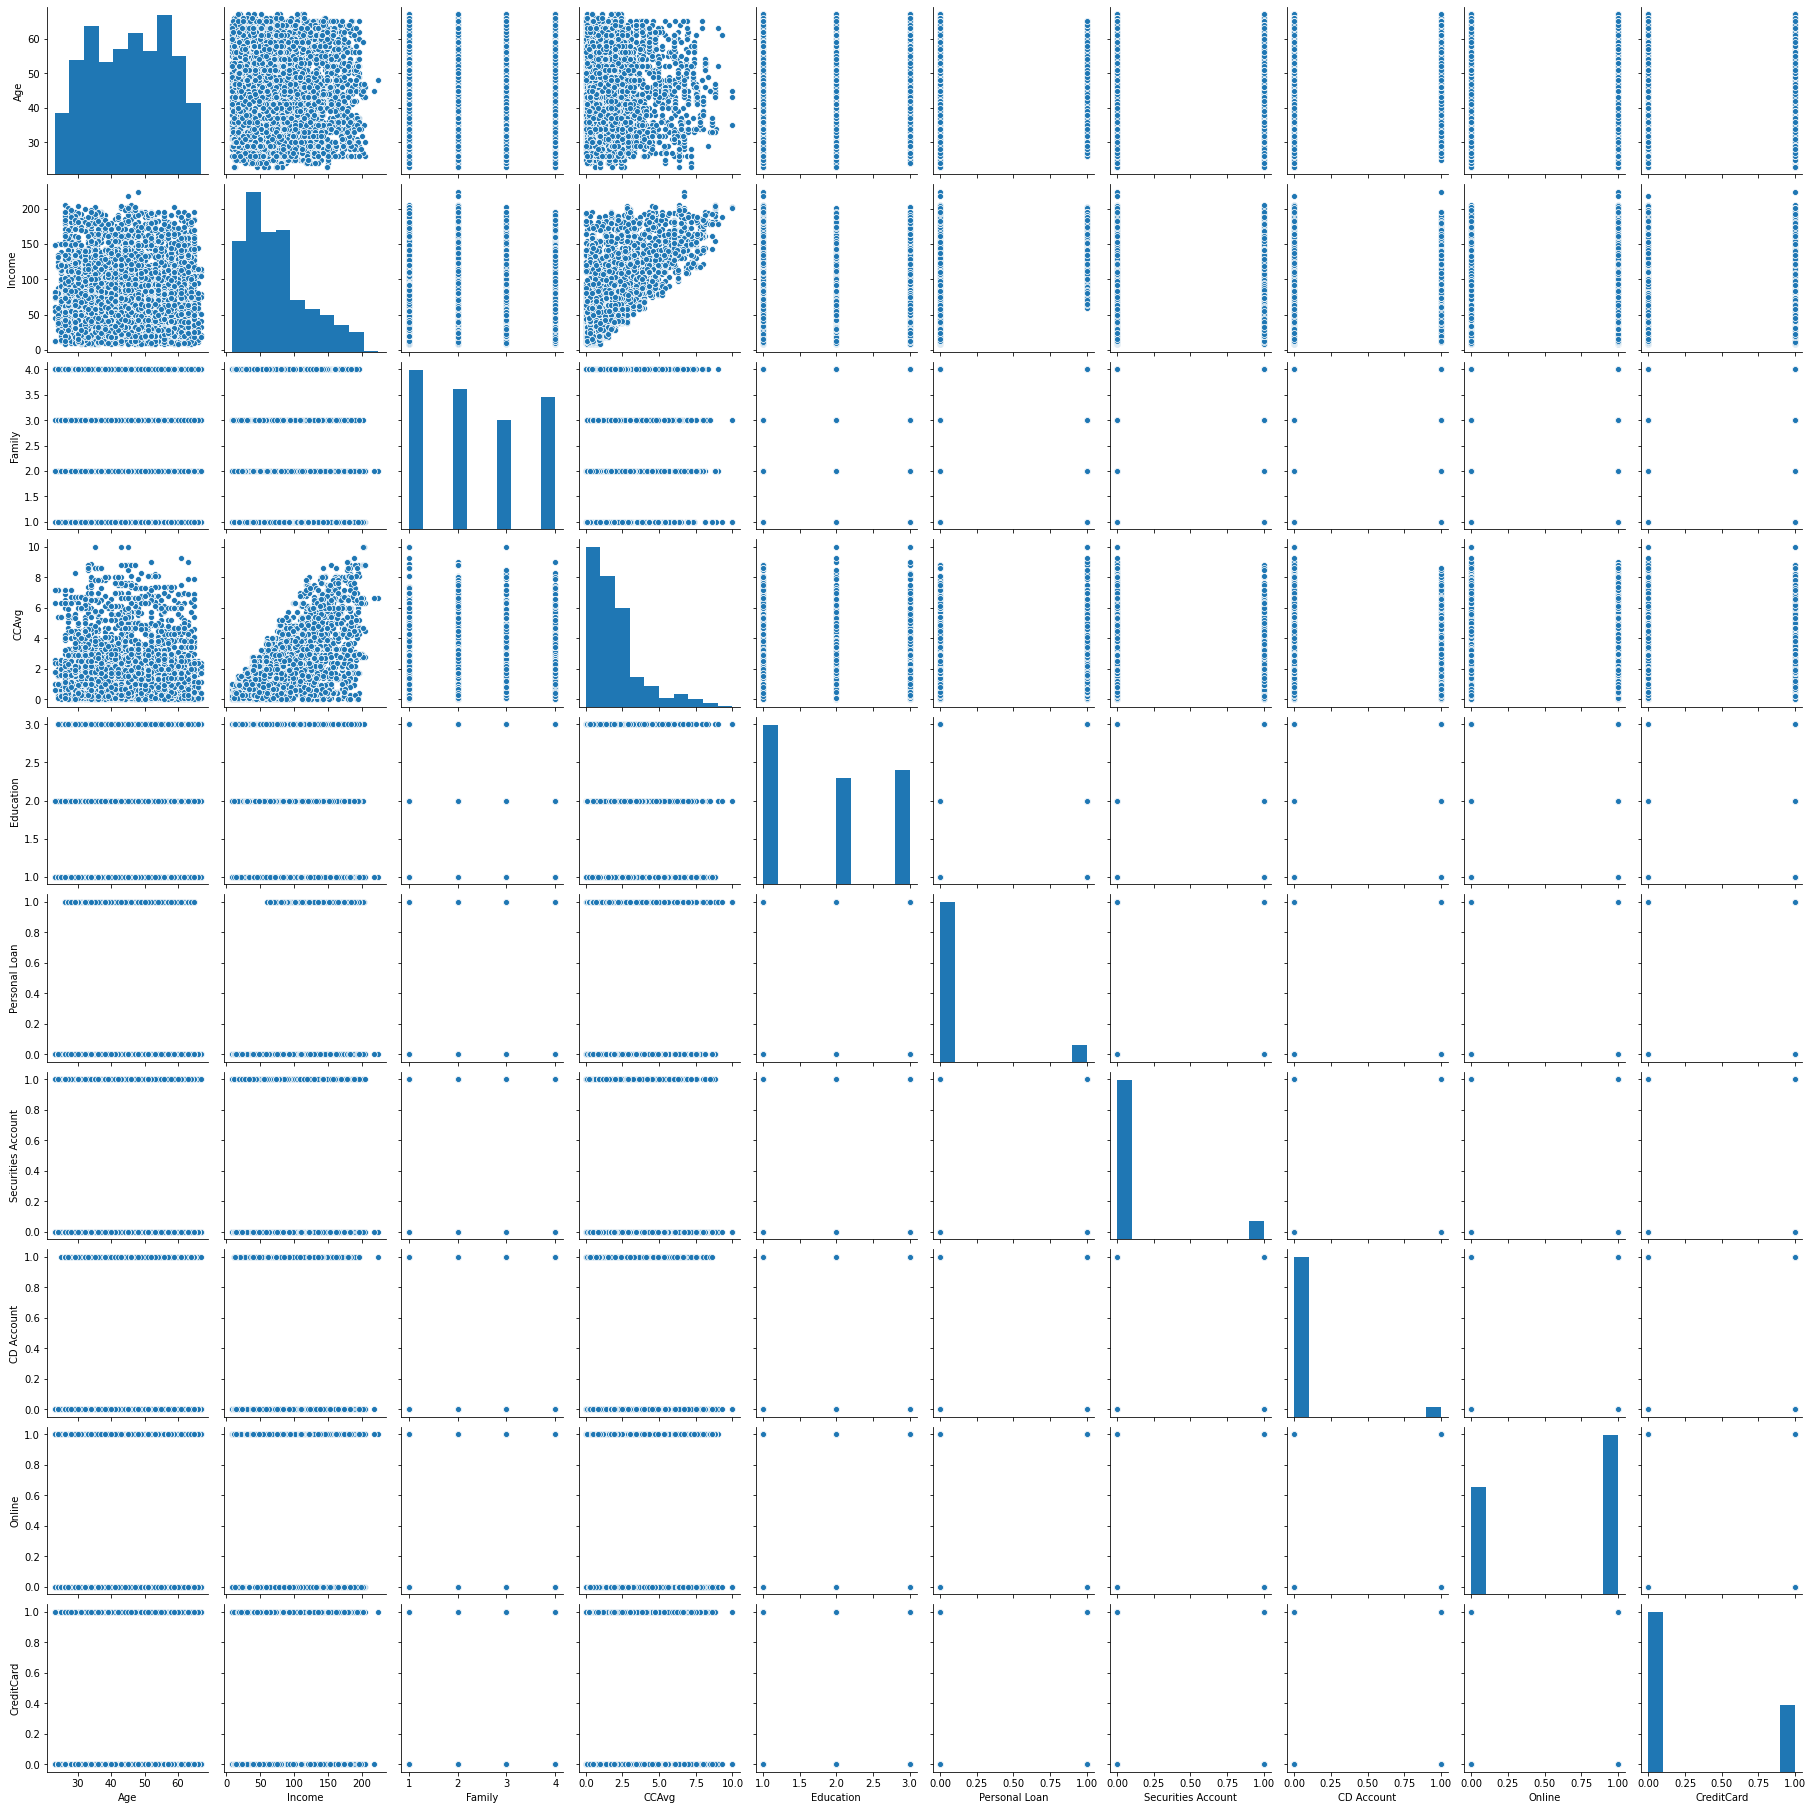

In [28]:
sns.pairplot(bankData)

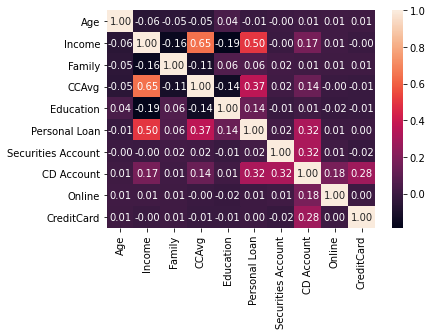

In [29]:
sns.heatmap(bankData.corr(), annot=True, fmt='.2f')

From pair plot graph we can say that how one column is dependent on other.

From heat map we can say that no column is highly correlated to other so there is no need to drop any column.

#Step4: Apply necessary transformations for the feature variables

**Columns to be normalized:**
1. CCAvg
2. Income

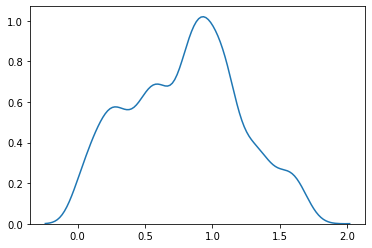

In [30]:
#normalize ccavg
pt = PowerTransformer(method = 'yeo-johnson', standardize=False)
x = pt.fit(bankData['CCAvg'].values.reshape(-1, 1))
bankData['CCAvg'] = x.transform(bankData['CCAvg'].values.reshape(-1, 1))
sns.distplot(bankData['CCAvg'].values, hist=False)

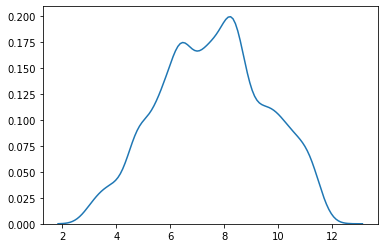

In [31]:
#normalize Income
pt = PowerTransformer(method = 'yeo-johnson', standardize=False)
x = pt.fit(bankData['Income'].values.reshape(-1, 1))
bankData['Income'] = x.transform(bankData['Income'].values.reshape(-1, 1))
sns.distplot(bankData['Income'].values, hist=False)

#Step5: Split the data into training and test set in the ratio of 70:30 respectively

In [32]:
#training
y = bankData['Personal Loan']
x = bankData.drop(['Personal Loan'], axis=1)
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0 )

#Step6: Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.

In [33]:
log_model = LogisticRegression(max_iter=3500)
log_model.fit(train_X, train_Y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#data prediction
train_pred_Y = log_model.predict(train_X)
pred_Y = log_model.predict(test_X)
print('acccuracy:train_Y, train_pred_Y=', metrics.accuracy_score(train_Y, train_pred_Y))
print('accuracy:test_Y, pred_Y=', metrics.accuracy_score(test_Y, pred_Y))

acccuracy:train_Y, train_pred_Y= 0.9557142857142857
accuracy:test_Y, pred_Y= 0.9526666666666667


predicted train > predicted test so it is not overfitted.

#Step7: Print all the metrics related for evaluating the model performance

In [35]:
#accuracy score
metrics.accuracy_score(test_Y, pred_Y)

0.9526666666666667

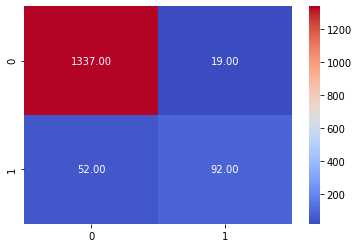

In [36]:
#confusion matrix
cm = metrics.confusion_matrix(test_Y, pred_Y)
sns.heatmap(cm, annot=True, fmt = '.2f', yticklabels=['0','1'], xticklabels = ['0', '1'], cmap='coolwarm')

In [37]:
#precision score
metrics.precision_score(test_Y, pred_Y)

0.8288288288288288

In [38]:
#f1 score
metrics.f1_score(test_Y, pred_Y)

0.7215686274509804

In [39]:
#recall score
metrics.recall_score(test_Y, pred_Y)

0.6388888888888888

In [40]:
#roc auc score
metrics.roc_auc_score(test_Y, pred_Y)

0.8124385447394297

#Step 8: Build various other classification algorithms and compare their performance


##8.1 Various classification Algorithms

**Classification algorithms considered:**
1. KNN
2. Gaussian Naive Bayes
3. Decision Tree
4. Random Forest

In [41]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(train_X, train_Y)
knn_pred_y = knn_model.predict(test_X)
metrics.accuracy_score(test_Y, knn_pred_y)

0.9633333333333334

In [42]:
metrics.precision_score(test_Y, knn_pred_y)

0.9587628865979382

In [43]:
metrics.f1_score(test_Y, knn_pred_y)

0.7717842323651453

In [44]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB() 
gnb_model.fit(train_X, train_Y)
gnb_pred_Y = gnb_model.predict(test_X)
metrics.accuracy_score(test_Y, gnb_pred_Y)

0.9306666666666666

In [45]:
metrics.precision_score(test_Y, gnb_pred_Y)

0.6694915254237288

In [46]:
metrics.f1_score(test_Y, gnb_pred_Y)

0.6030534351145038

In [47]:
#Decision Tree
dtree_model = DecisionTreeClassifier()
dtree_model.fit(train_X, train_Y)
dtree_pred_Y = dtree_model.predict(test_X)
metrics.accuracy_score(test_Y, dtree_pred_Y)

0.9793333333333333

In [48]:
metrics.precision_score(test_Y, dtree_pred_Y)

0.8896551724137931

In [49]:
metrics.f1_score(test_Y, dtree_pred_Y)

0.8927335640138409

In [50]:
#Random Forest
rForest_model = RandomForestClassifier(random_state=1)
rForest_model.fit(train_X, train_Y)
rForest_pred_Y = rForest_model.predict(test_X)
metrics.accuracy_score(test_Y, rForest_pred_Y)

0.9886666666666667

In [51]:
metrics.precision_score(test_Y, rForest_pred_Y)

0.9774436090225563

In [52]:
metrics.f1_score(test_Y, rForest_pred_Y)

0.9386281588447652

##8.2 Perfomance comparision

In [53]:
#gathering all models
models = []
models.append(LogisticRegression(max_iter=3500))
models.append(KNeighborsClassifier())
models.append(GaussianNB())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())

#storing names in same order for graph
names = ['Log_reg', 'KNN', 'GaussNB', 'DTree', 'RForest']

In [54]:
# evaluate each model loopwise
#each model is checked with 15 splits 
results = []
kfold = model_selection.KFold(n_splits=15)
for model in models:
  cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
  results.append(cv_results)
for (name, result) in  zip(names, results):
  print('{} :\n- mean:{:f}, std:{:f}\n'.format(name, result.mean(), result.std()))

Log_reg :
- mean:0.954404, std:0.006919

KNN :
- mean:0.959405, std:0.009197

GaussNB :
- mean:0.925998, std:0.012909

DTree :
- mean:0.985603, std:0.006305

RForest :
- mean:0.988002, std:0.004642



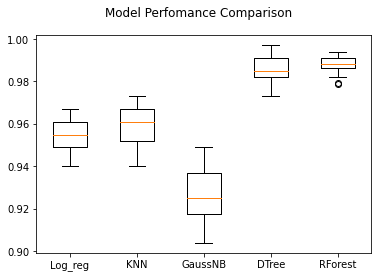

In [55]:
#boxplot for all models
fig = plt.figure()
fig.suptitle('Model Perfomance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Inference:** From graph and data printed above it, we can say that RandomForest model is most suitable one.

#Step9: Give a business understanding of your model

* **Step1:**
    
    1. Imported libraries and read data.
    2. Printed first 5 columns and shape for understanding structure of data.
    3. Printed columns and characterized them to understand what the columns are and meaning of them

* **Step2:**
    1. Checked whether there is any column with negative data and found out 'experience' is a column with negative data which actually should have only positive values.
    2. Checked correlation of 'experience' with all other columns and found that it has high correlation with 'Age' column, so there will be no effect on data even if we dropped 'experience', so dropped it.
    3. 'ID' column is also dropped because it is uniquely generated number with no meaning.

* **Step3:**
  1. After observing no.of unique values in each column, zipcode has 467 unique values, but zipcode is not much useful, so it was dropped.
  2. From univariate analysis it was clear 'Income', 'CCAvg', 'Mortgage' have skewed data. 
  3. Mortgage is highly skewed(very high) and data other than 0 in it are negligible in count, so if we try to normalize or bin it, it will surely feed us with wrong data, so it is better to drop and therefore dropped.
  4. In bivariate analysis from pairplot we devised how one variable is dependent on other. From heatmap we observed that no column is highly correlated to other, so there is no extra column to be dropped.

* **Step4:**

    After all this analysis, 'Income' and 'CCAvg' are columns to be normalized.
    And normalized using power plot.
* **Step5:**

    Data is splitted into 70:30 ratio and trained data.

* **Step6:**

    Created logistic regression model and got test accuracy score of 0.949.

    train predict accuracy score > test predict accuracy score, so we can conclude that model is not over fitted.

* **Step7:**

    Took other algorithms(KNN, Gaussian Naive Bayes, Decision Tree, Random Forest) and applied on data.

* **Step8:**

    Compared perfomances of all models with boxplot and concluded that random forest algorithm is the most suitable one for this problem.